## Preliminary Results

In [53]:
library(tidyverse)
library(readxl)
library(infer)
library(moderndive)

### Load Data

In [54]:
raw <- read_xlsx("adult.xlsx")

head(raw)

age,work_class,id,education,marital_status,occupation,relationship,ethnicity,sex,capital-gain,capital-loss,hours_per_week,country,income_group
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
56,Private,169133,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,<=50K
25,Private,191230,Some-college,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,Yugoslavia,<=50K
20,Private,175069,Some-college,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,<=50K
35,Private,164526,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,>50K
40,Local-gov,183096,9th,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K
31,Private,182177,Bachelors,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,<=50K


### Clean and Wrangle Data

For cleaning our data, we are going to

1. Select the relevent categorical and numerical columns for our question
2. Regroup the highest education for every observer that did not graduate highschool into 1 group

**1. Select the relevent categorical and numerical columns for our question**

In [55]:
data <- raw %>%
    select(work_class, education, marital_status, hours_per_week)

head(data)

work_class,education,marital_status,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Private,HS-grad,Married-civ-spouse,50
Private,Some-college,Never-married,40
Private,Some-college,Never-married,40
Private,HS-grad,Married-civ-spouse,40
Local-gov,9th,Married-civ-spouse,40
Private,Bachelors,Married-civ-spouse,40


**2. Regroup the highest education for every observer that did not graduate highschool into 1 group**

This dataset differentes between the highest highschool, middleschool or elementary grade a person has completed or preschool. We will be grouping those observations into one education category called "Less-than-HS".

In [56]:
data %>%
    group_by(education) %>%
    summarise(n = n())

education,n
<chr>,<int>
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [57]:
data$education[data$education == "10th" |
          data$education == "11th" |
          data$education == "12th" |
          data$education == "1st-4th" |
          data$education == "5th-6th" |
          data$education == "7th-8th" |
          data$education == "9th" |
          data$education == "Preschool"] = "Less-than-HS"

The cell below shows that we have renamed the observations that did not graduate highschool

In [58]:
data %>%
    group_by(education) %>%
    summarise(n = n())

education,n
<chr>,<int>
Assoc-acdm,1067
Assoc-voc,1382
Bachelors,5355
Doctorate,413
HS-grad,10501
Less-than-HS,4253
Masters,1723
Prof-school,576
Some-college,7291


### Broad Overview of Data

This section has visualizations that allow us to better compare our numerical variable across our different categorical variables. First we want to get a count of how many people work x hours per week, where x is a number. We will do this by making a frequency distribution. The remaining plots will be boxplots of the number of hours worked for each of our three categorical variables (workclass, education and marital status). We chose to use boxplots because it allows us to easily compare each category within our variables by plotting the boxes horizontally and it gives us more details about the data such as each quartile.

In [59]:
# ---------- Configerations for our plots ------------------

options(repr.plot.width = 20, repr.plot.height = 8)

plot_config <- theme_classic() +
                theme(plot.title = element_text(hjust = 0.5),
                      legend.position="none",
                      panel.spacing = unit(0.1, "lines"),
                      strip.text.x = element_text(size = 8),
                      panel.spacing.x = unit(0.75, "cm"),
                      text = element_text(size = 20))
                      
boxplot_scale <- scale_y_continuous(breaks = seq(0, 100, 10))

workclass_labels <- scale_x_discrete(labels = c("Unknown", "Federal Gov.", "Local Gov.",
                                "Never Worked", "Private", "Self Employed \n(Corporation)", "Self Employed",
                                "State Government", "Without Pay"))
                                
education_labels <- scale_x_discrete(labels = c("Associates", "Associates \nVocational School", "Bachelors",
                                "Doctorate", "Highschool \nGraduate", "Not Highschool \nGraduate",
                                "Masters", "Professional \nSchool", "Some College"))
                                
marital_status_labels <- scale_x_discrete(labels = c("Divorced", "Married Spouse \nIn Armed Forces", "Married",
                                                     "Married Spouse \nAbsent",
                                                     "Never Married", "Seperated", "Widowed"))

In [60]:
hrs_per_week_all <- data %>% ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5) +
    xlab("Hours Per Week") +
    ylab("Count") +
    ggtitle("Frequency Disribution of Hours per Week Worked for Everyone") +
    plot_config +
    scale_y_continuous(breaks = seq(0, 30000, 2000)) +
    scale_x_continuous(breaks = seq(0, 110, 10))

hrs_per_week_workclass <- data %>%
    ggplot(aes(x = work_class, y = hours_per_week, color = work_class)) +
    geom_boxplot() +
    xlab("Workclass") +
    ylab("Hours per Week") +
    ggtitle("Hours per Week Worked Based on Workclass") +
    plot_config +
    boxplot_scale +
    workclass_labels

hrs_per_week_education <- data %>%
    ggplot(aes(x = education, y = hours_per_week, color = education)) +
    geom_boxplot() +
    xlab("Education") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Education") +
    plot_config +
    boxplot_scale +
    education_labels

hrs_per_week_marital_status <- data %>%
    ggplot(aes(x = marital_status, y = hours_per_week, color = marital_status)) +
    geom_boxplot() +
    xlab("Marital Status") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Marital Status") +
    plot_config +
    boxplot_scale +
    marital_status_labels

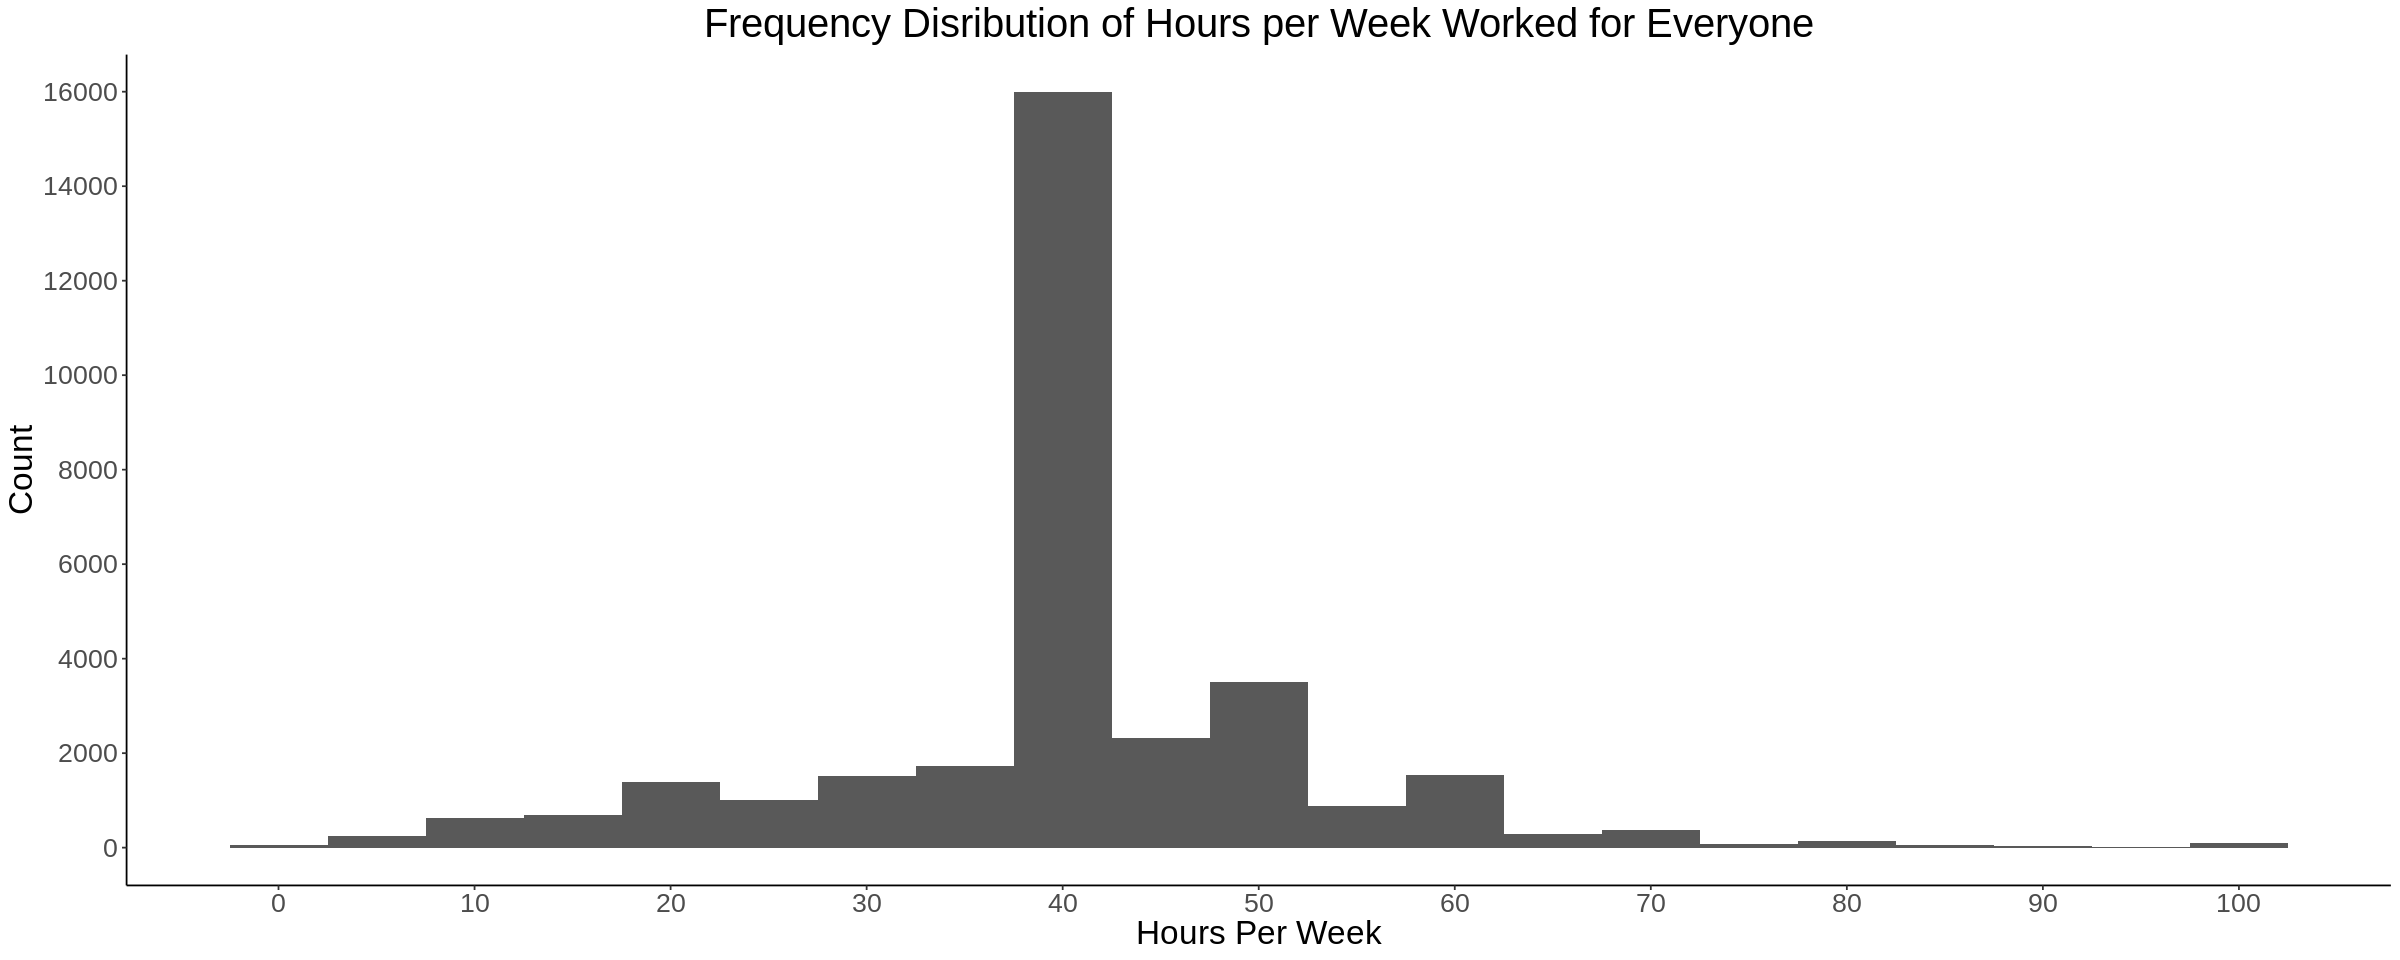

In [61]:
hrs_per_week_all

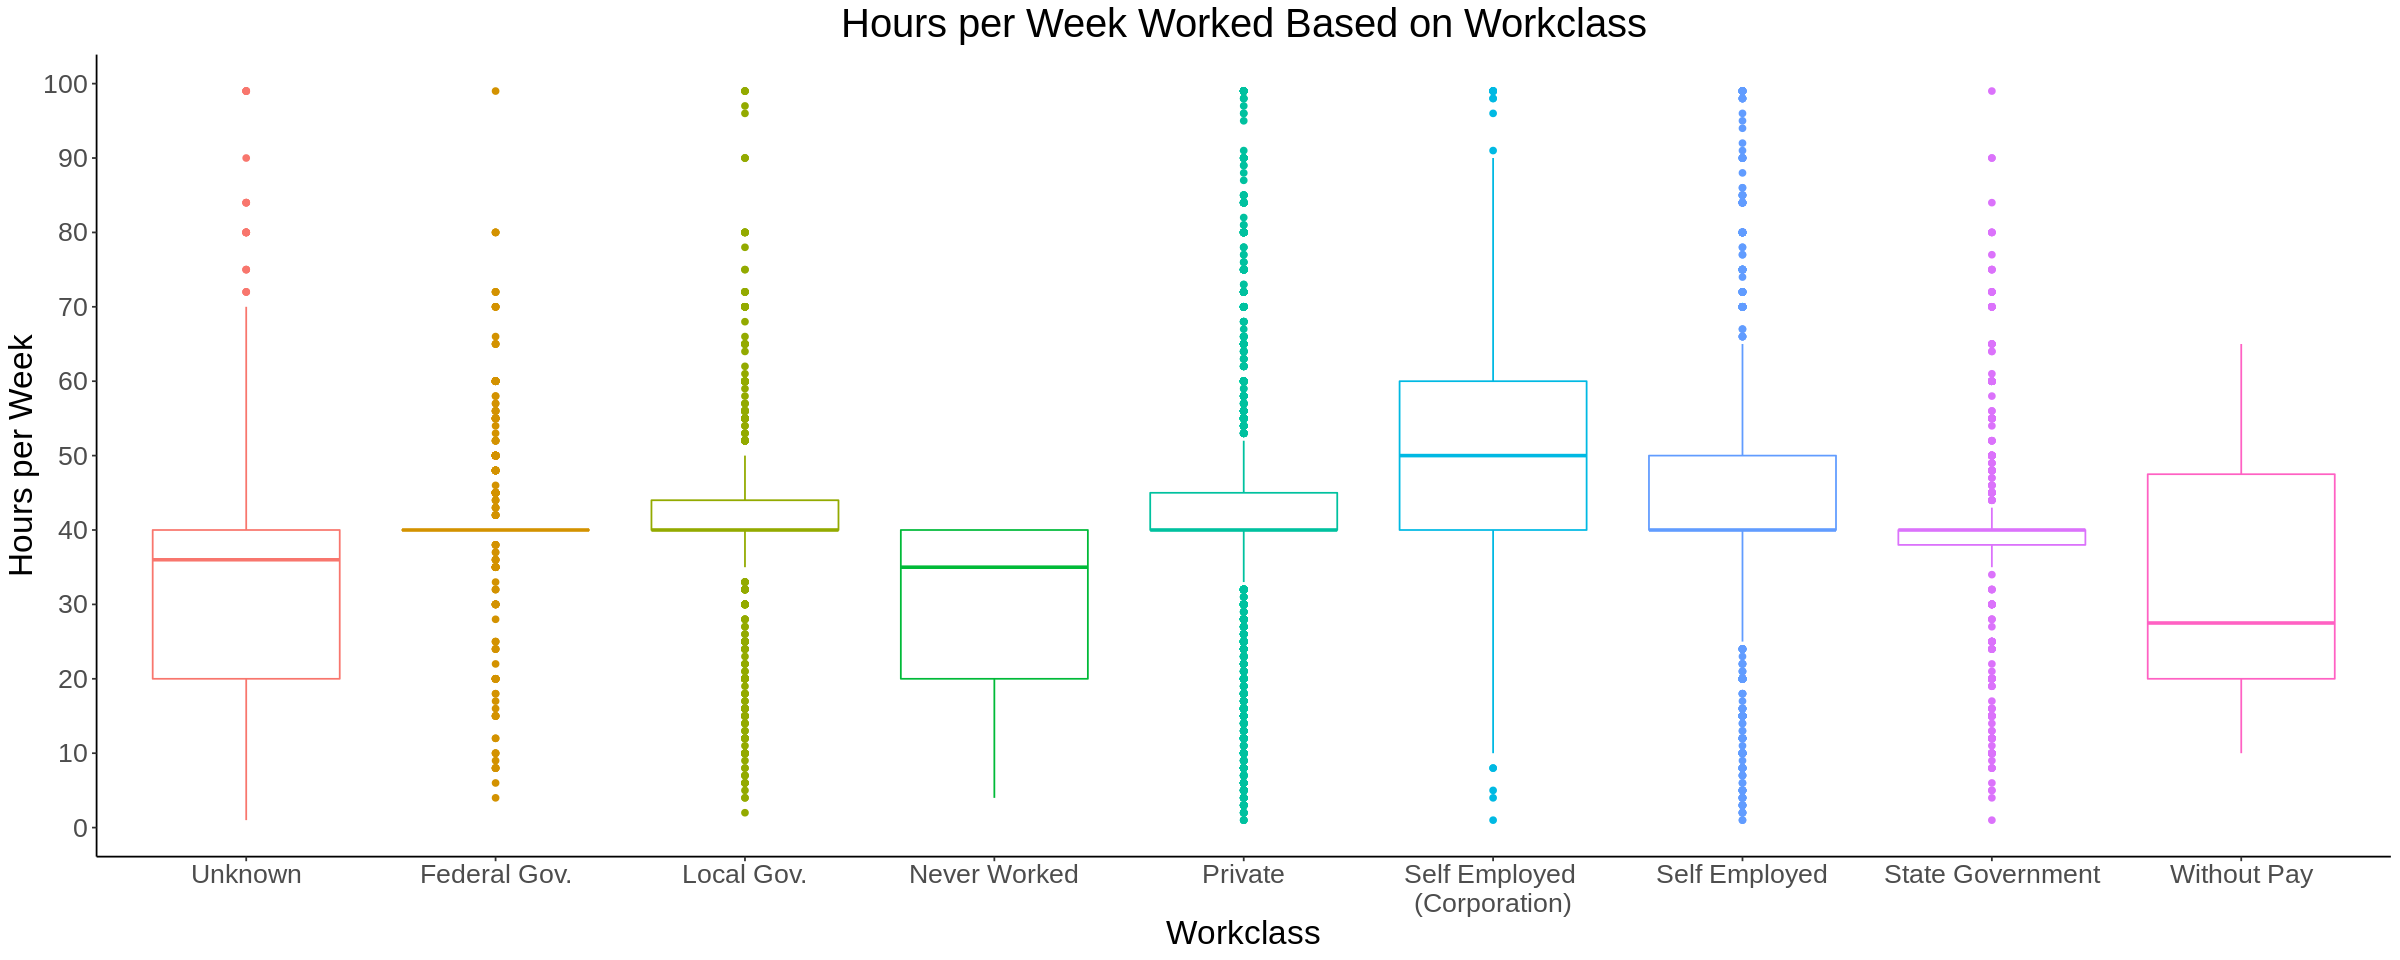

In [62]:
hrs_per_week_workclass

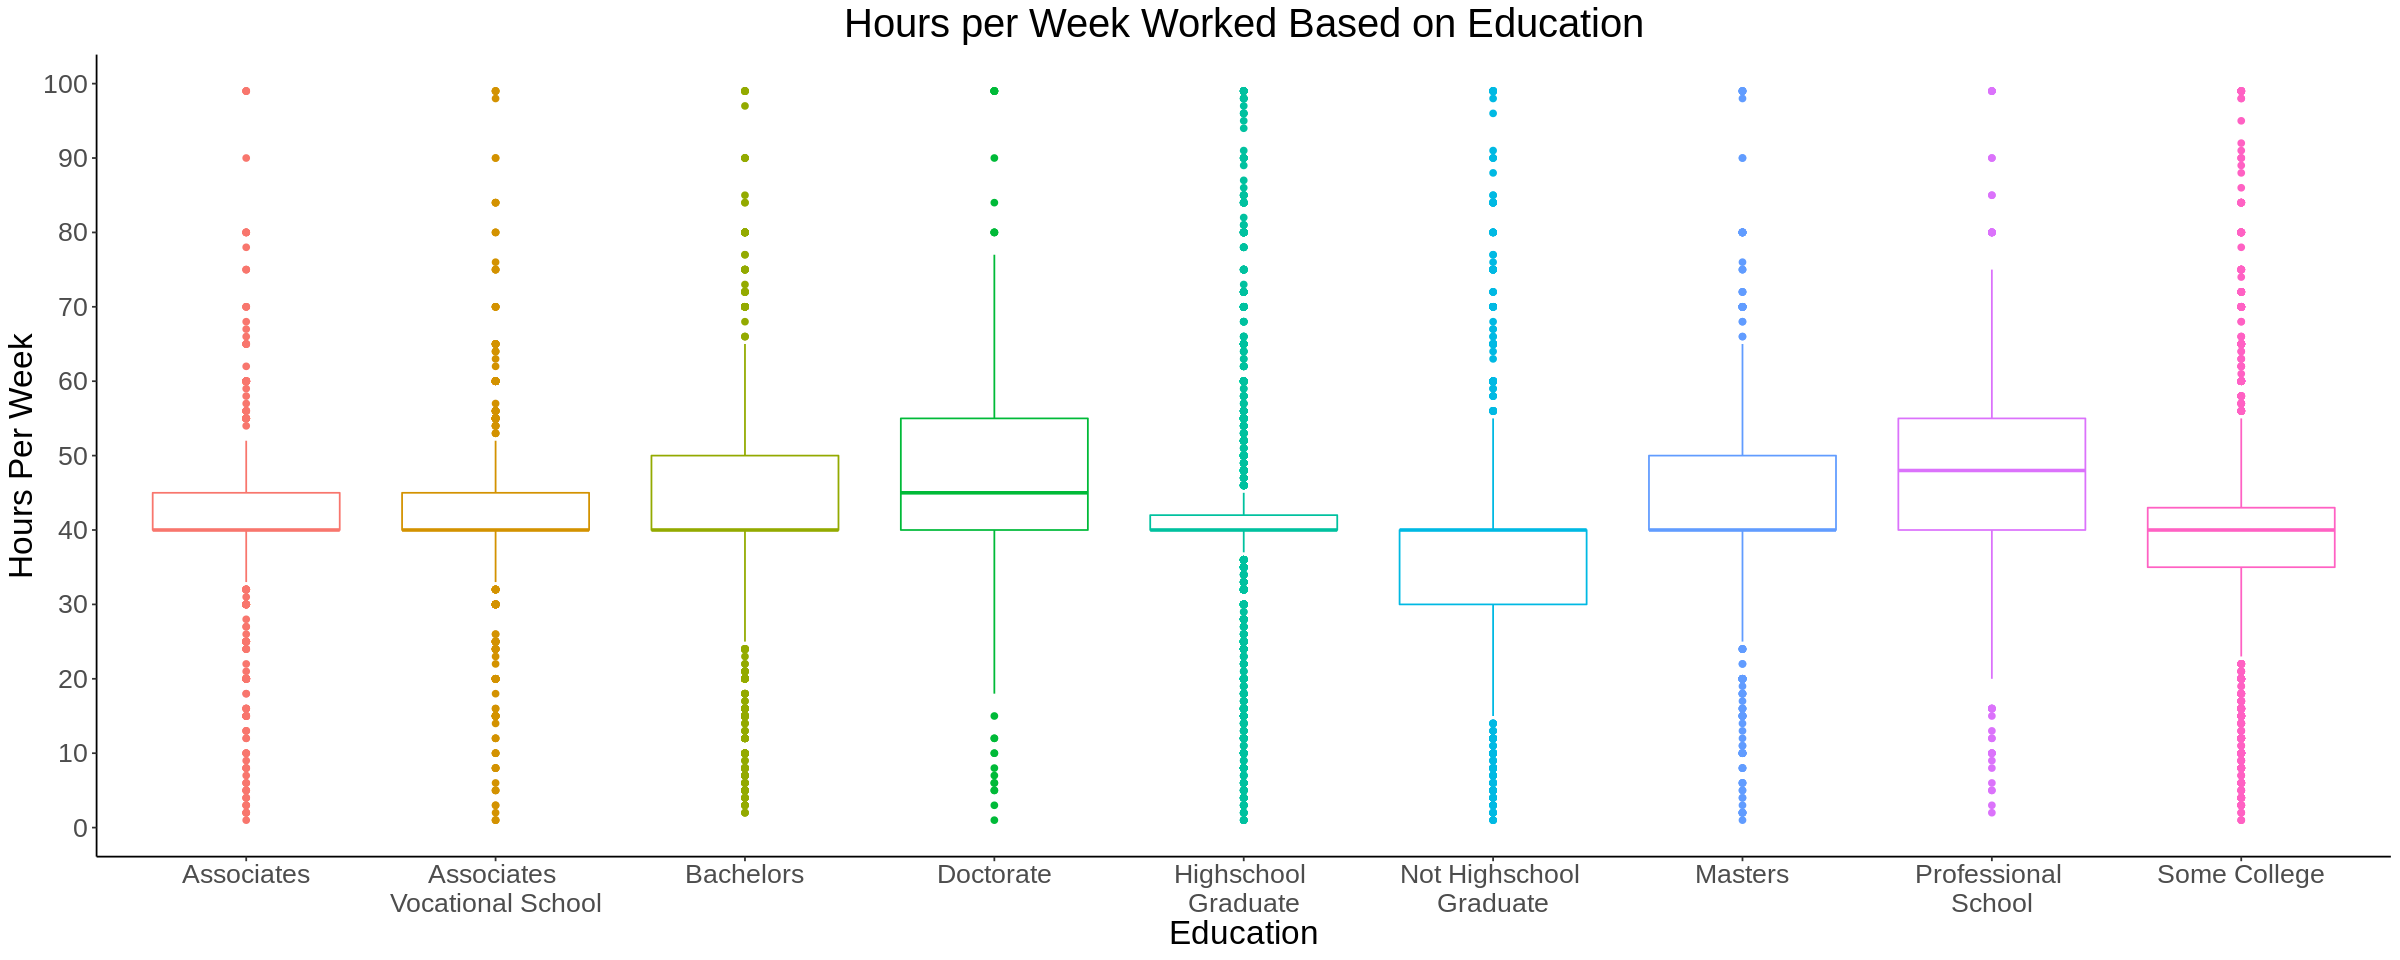

In [63]:
hrs_per_week_education

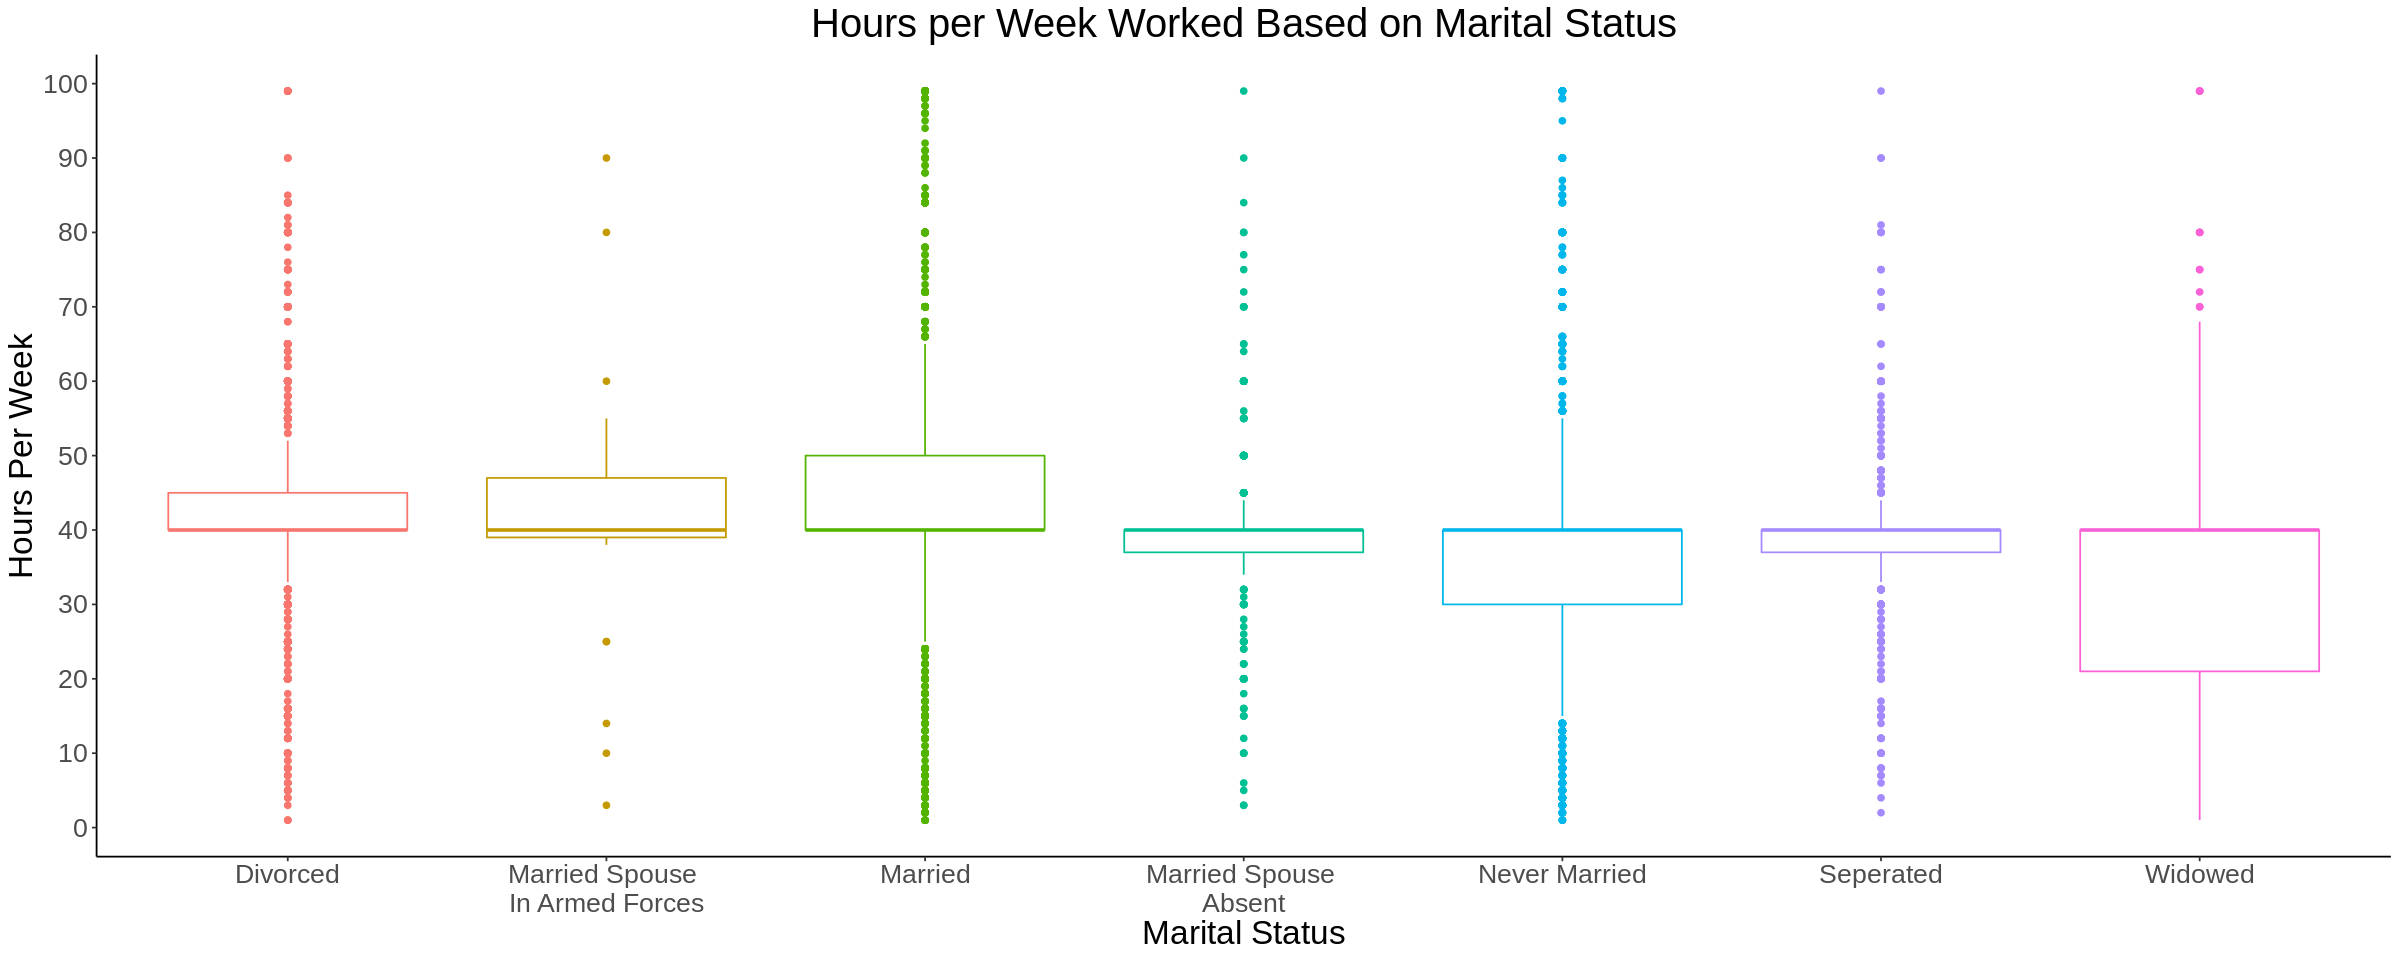

In [64]:
hrs_per_week_marital_status

### Statistics of Our Dataset

The statistic we are most concerned with is the mean hours worked across the three variables. We will compute that statistic, as well as the standard deviation to give us an idea of the spread for further analysis. Then we will plot the means across our categorical variables to get a visual representation of the statistic.

In [65]:
hrs_work_class <- data %>%
    group_by(work_class) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_education <- data %>%
    group_by(education) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_marital_status <- data %>%
    group_by(marital_status) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

In [66]:
head(hrs_work_class)

work_class,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
?,31.91939,14.909903
Federal-gov,41.37917,8.838605
Local-gov,40.98280,10.771559
Never-worked,28.42857,15.186147
Private,40.26710,11.256298
Self-emp-inc,48.81810,13.900417


In [67]:
head(hrs_education)

education,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
Assoc-acdm,40.50422,12.19667
Assoc-voc,41.61071,10.79338
Bachelors,42.61401,11.44619
Doctorate,46.97337,15.08445
HS-grad,40.57537,11.33376
Less-than-HS,36.71785,13.34644


In [68]:
head(hrs_marital_status)

marital_status,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
Divorced,41.24668,10.67663
Married-AF-spouse,41.13043,19.44060
Married-civ-spouse,43.28486,11.90505
Married-spouse-absent,39.66986,11.76737
Never-married,36.94000,12.43254
Separated,39.30146,10.37753


In [69]:
bar_means_hrs_work_class <- hrs_work_class %>%
    ggplot(aes(x = work_class, y = mean_hours_per_week, fill = work_class)) +
    geom_bar(stat = "identity") +
    xlab("Work Class") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Work Class") +
    plot_config +
    workclass_labels

bar_means_hrs_education <- hrs_education %>%
    ggplot(aes(x = education, y = mean_hours_per_week, fill = education)) +
    geom_bar(stat = "identity") +
    xlab("Education Level") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Education Level") +
    plot_config +
    education_labels

bar_means_marital_status <- hrs_marital_status %>%
    ggplot(aes(x = marital_status, y = mean_hours_per_week, fill = marital_status)) +
    geom_bar(stat = "identity") +
    xlab("Marital Status") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked Based on Marital Status") +
    plot_config +
    marital_status_labels

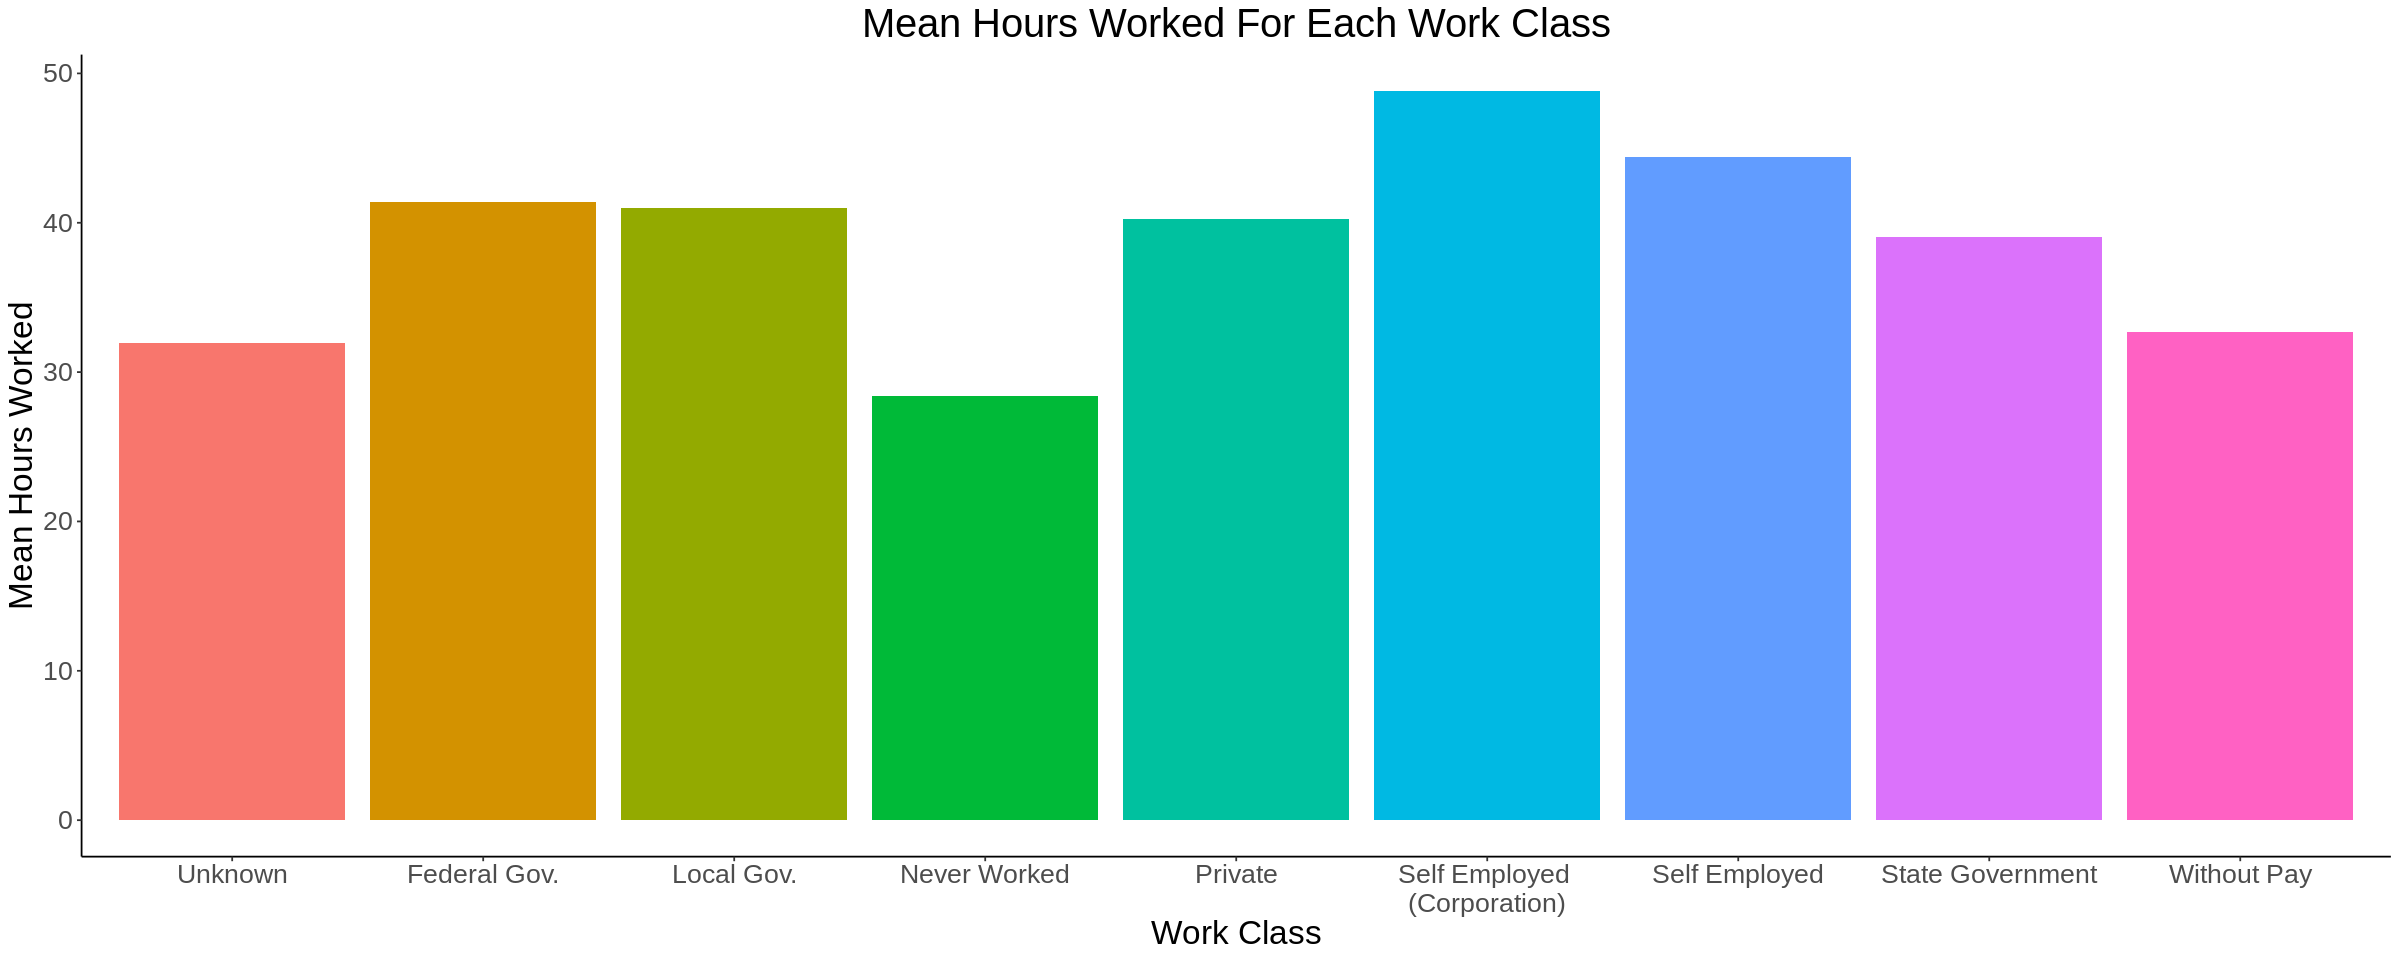

In [70]:
bar_means_hrs_work_class

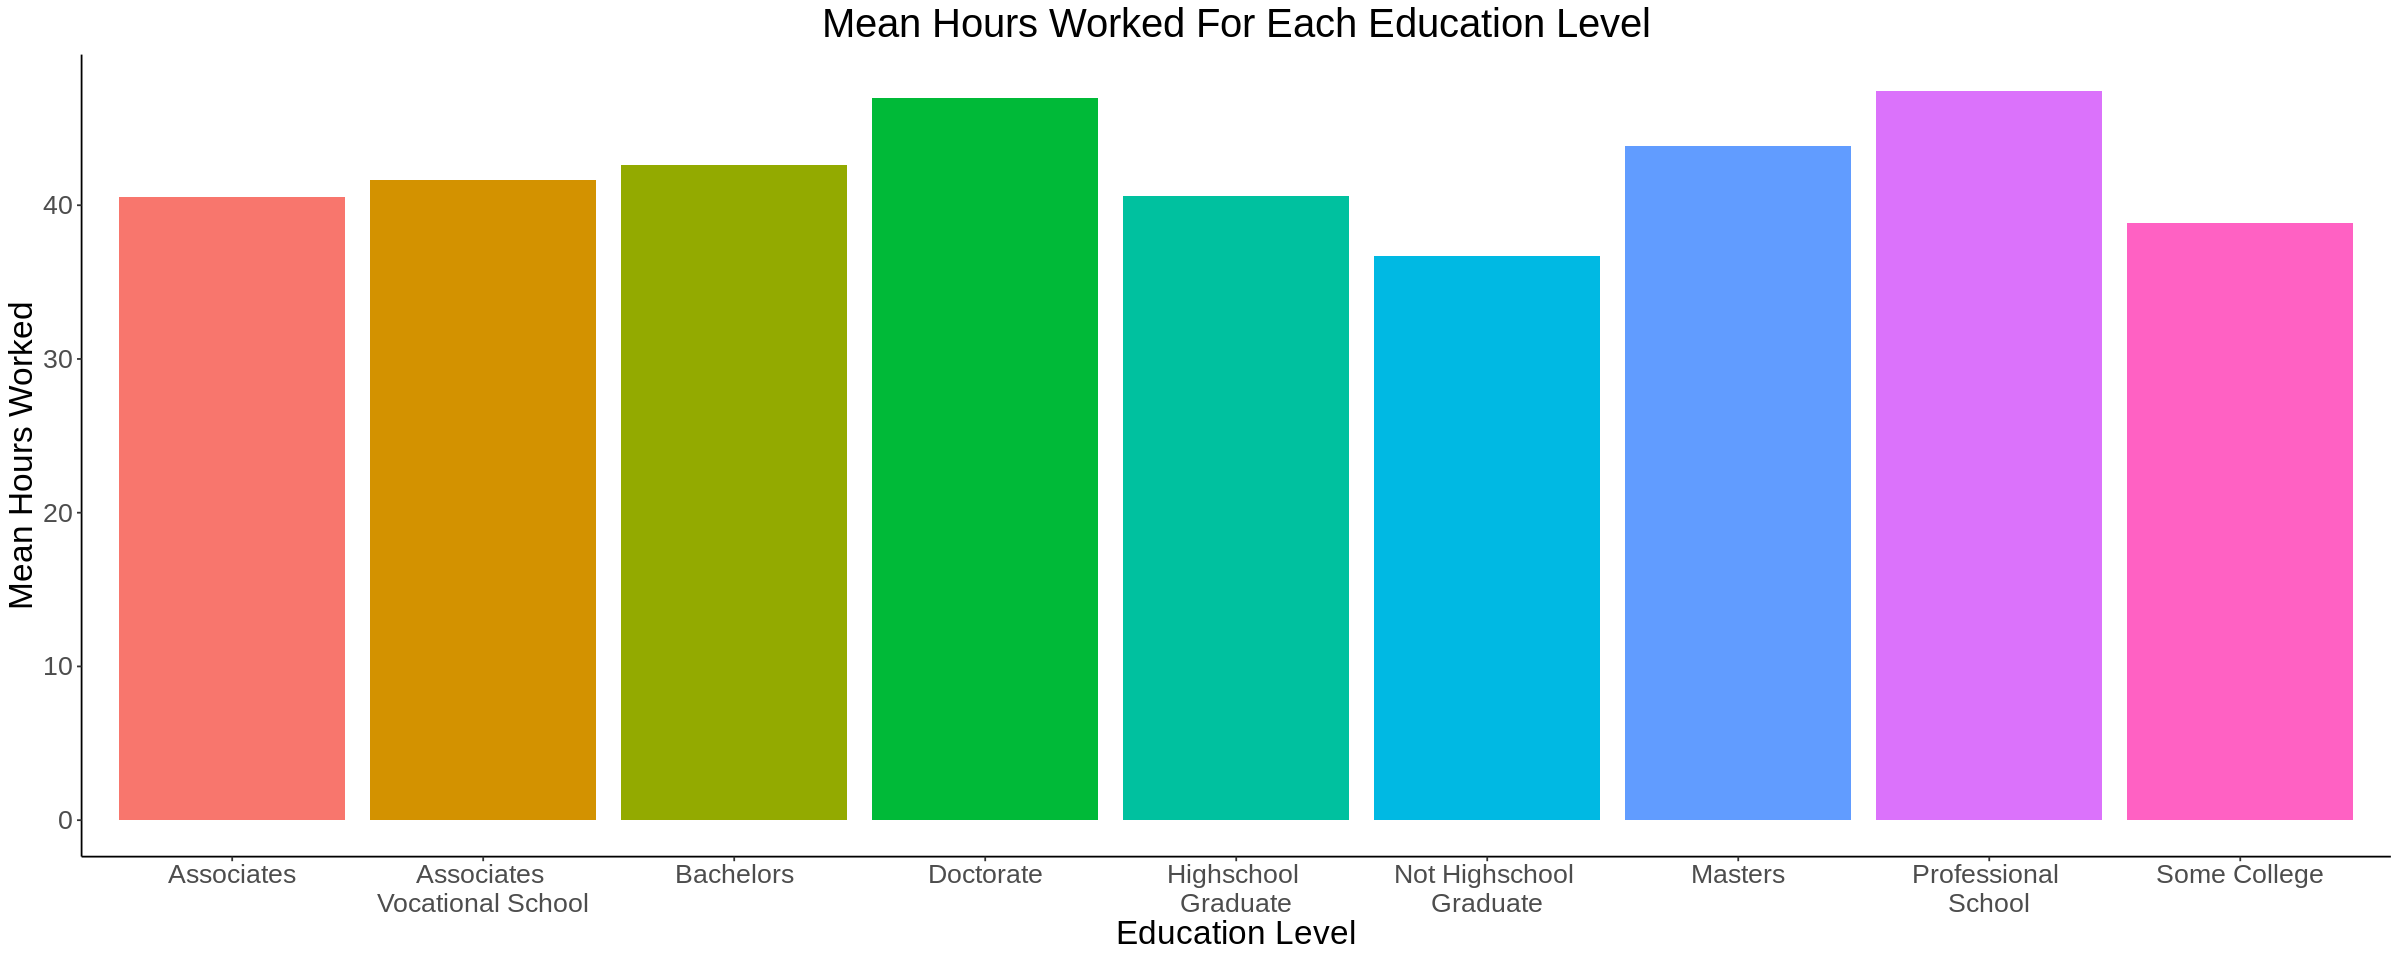

In [71]:
bar_means_hrs_education

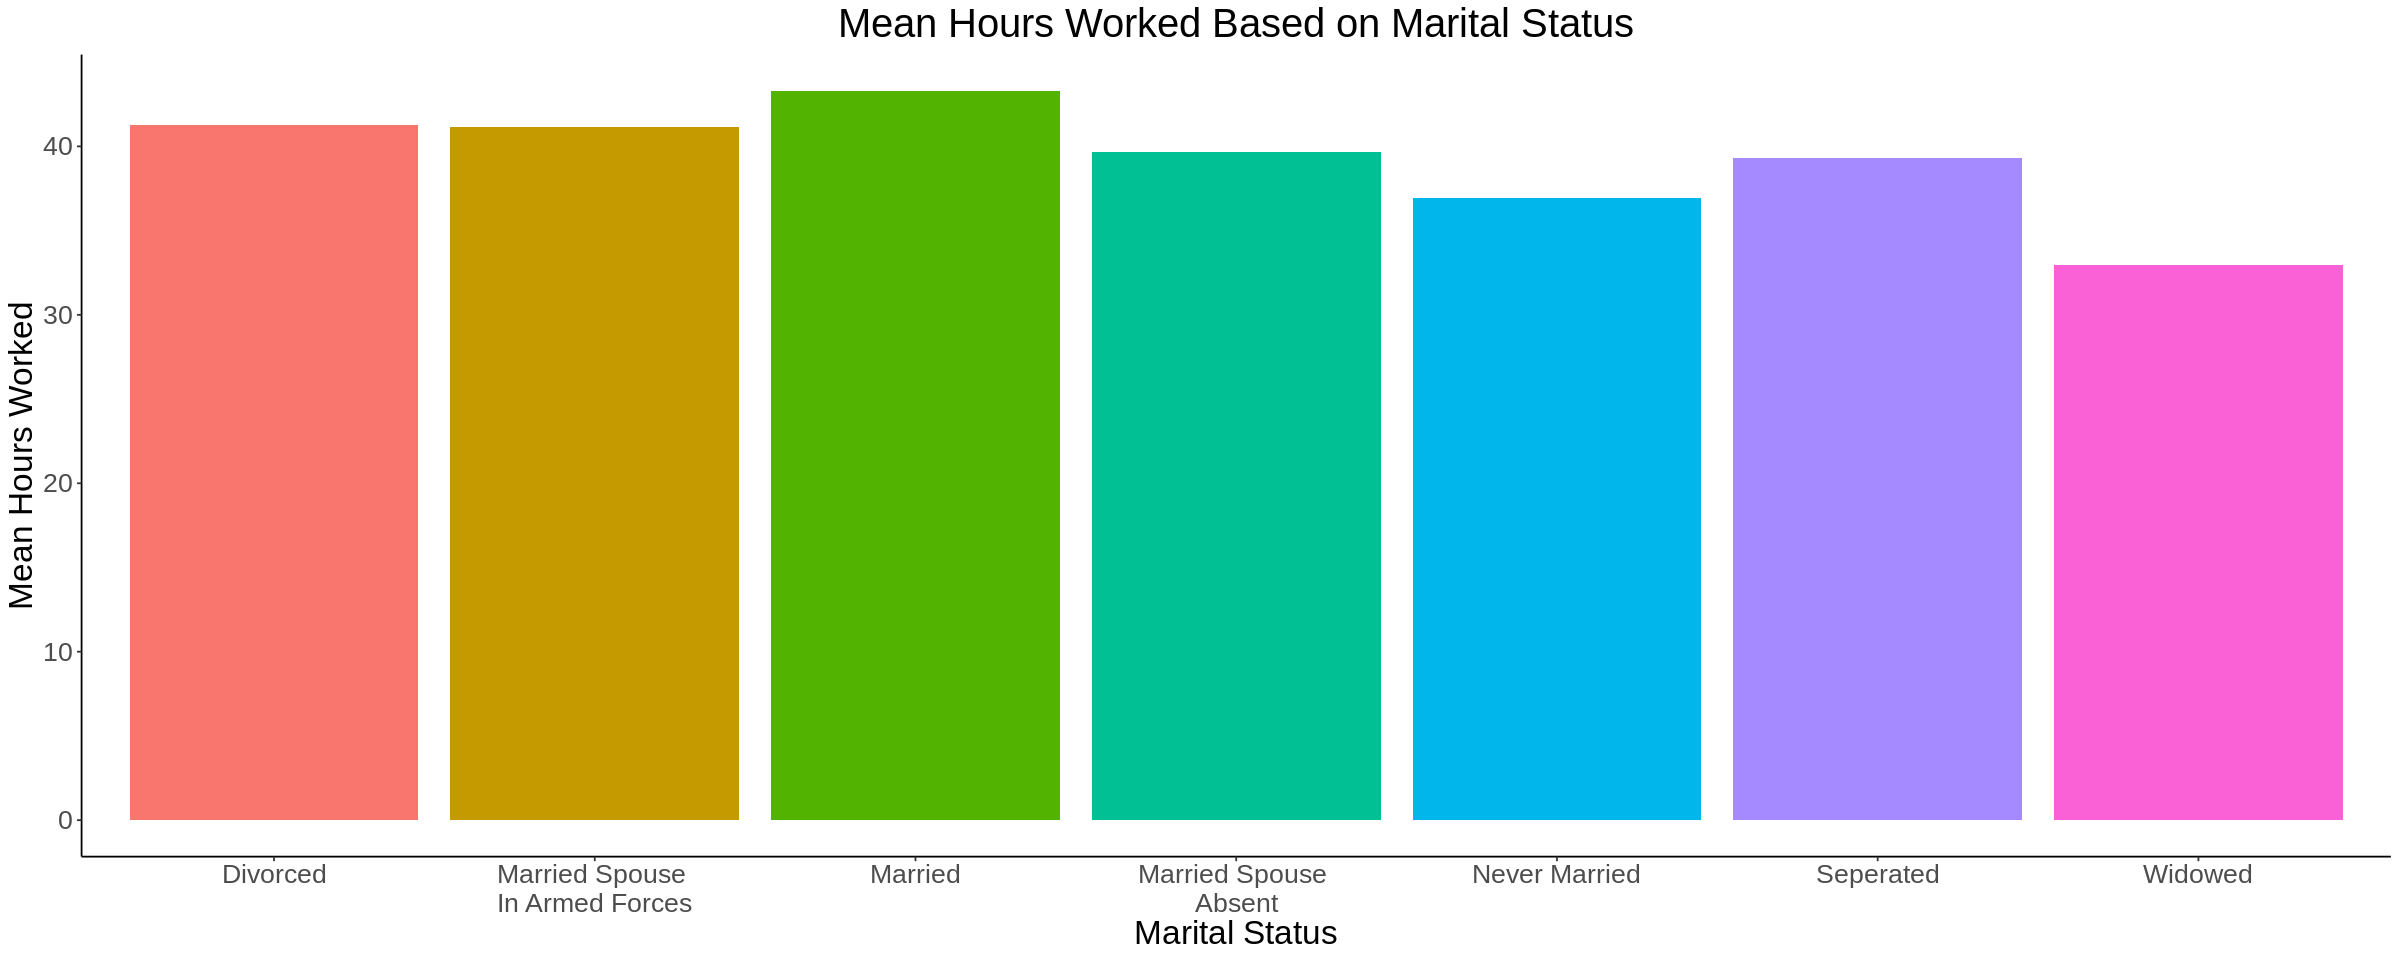

In [72]:
bar_means_marital_status

In [80]:
data$education[data$education == "Assoc-acdm" |
               data$education == "Assoc-voc" |
               data$education == "Bachelors" |
               data$education == "Doctorate" |
               data$education == "HS-grad" |
               data$education == "Masters" |
               data$education == "Prof-school" |
               data$education == "Some-college"] = "More-than-HS"
head(data)
compare_hour_low_hi <- data |> 
    group_by(education) |> 
    summarize(mean_hours_per_week=mean(hours_per_week))
compare_hour_low_hi 
education_hour_table <- data |> 
    select(education,hours_per_week)
education_hour_table


work_class,education,marital_status,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Private,More-than-HS,Married-civ-spouse,50
Private,More-than-HS,Never-married,40
Private,More-than-HS,Never-married,40
Private,More-than-HS,Married-civ-spouse,40
Local-gov,Less-than-HS,Married-civ-spouse,40
Private,More-than-HS,Married-civ-spouse,40


education,mean_hours_per_week
<chr>,<dbl>
Less-than-HS,36.71785
More-than-HS,40.99629


education,hours_per_week
<chr>,<dbl>
More-than-HS,50
More-than-HS,40
More-than-HS,40
More-than-HS,40
Less-than-HS,40
More-than-HS,40
More-than-HS,40
More-than-HS,65
Less-than-HS,20


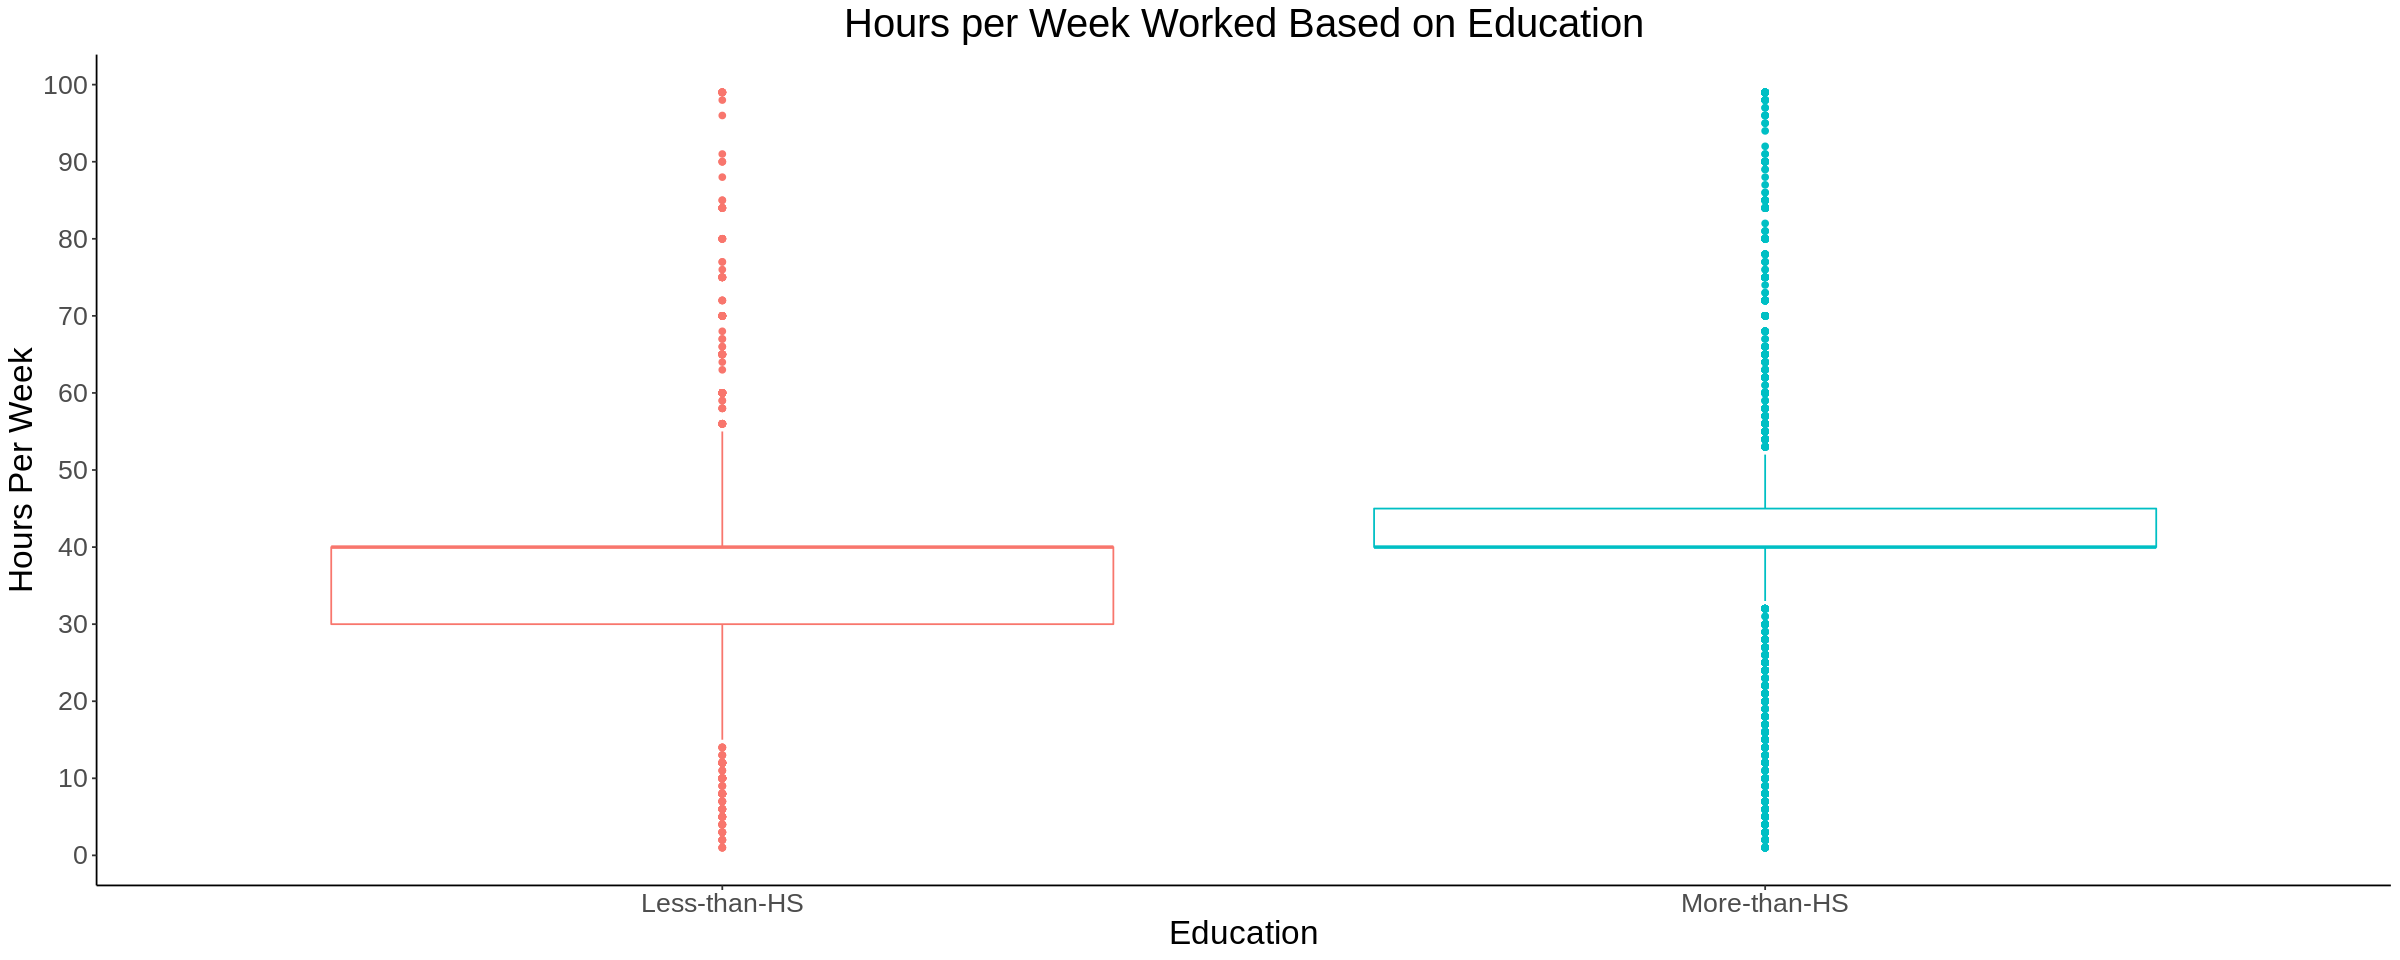

In [74]:
education_hour_box_plot <- education_hour_table %>%
    ggplot(aes(x = education, y = hours_per_week, color = education)) +
    geom_boxplot() +
    xlab("Education") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Education") +
    plot_config +
    boxplot_scale
education_hour_box_plot

## Methods: Plan

Our reports are trustworthy for:
- The data used in this report is extracted from the 1994 U.S. Census Bureau database, the authenticity of the data is fully guaranteed, and more than 50 papers have cited the data. This directly or indirectly proves the validity of the data while minimizing the possibility of a bias in the statistical process. It also provides a credible basis for our report.
- Our report fully organizes the raw data, filtering out the variables and attributes of interest. In the process of exploratory data analysis, we classified the education level of individuals in the data, and those who did not complete high school education were classified as Less-than-HS/not high school graduates. These adequate preparations can reduce our practical error rate in operation and guarantee the reliability of the report.
- The sample space of the data we use is large enough, with more than 30,000 observations, which reduces the possibility of sampling bias in our data to a certain extent.
- 
 - The methodologies in our report will be replicable.
- The data will be cleaned and processed properly without compromising the data semantics

Expectation of this project:
- We expect to find significant difference in mean hours worked among different levels of education.
- We also expect a finding that no significant difference in mean hours worked among different marital status.
    
Impact of this project:
- This project will indicate mean hours worked will differ by levels of education since levels of education will determine the job options available.
- *If correlate working hours to income, this finding can encourage people to get higher level of education.
- This project will show mean hours worked will not differ by marital status.
- *This finding can help employers to identify that marital status should not be factored into recruitment

Future questions on this project
- How does mean hours worked affect income?
- Which working class has higher mean hours worked?

In [93]:
r_sample <- education_hour_table |> 
    rep_sample_n(size=32561, reps= 500, replace=TRUE) |>
    group_by(replicate,education) |>
    summarize(mean=mean(hours_per_week)) |>
    group_by(replicate) |>
    mutate(diff = mean-lag(mean)) |>
    select(replicate,diff) |>
    filter(!is.na(diff))
              
r_sample

`summarise()` has grouped output by 'replicate'. You can override using the `.groups` argument.



replicate,diff
<int>,<dbl>
1,4.488936
2,4.357159
3,4.076408
4,4.346410
5,4.322344
6,4.411184
7,4.386289
8,4.191362
9,4.102787


In [75]:
observed_statistic <- education_hour_table |> 
    specify(hours_per_week ~ education) |> 
    calculate(stat = "diff in means", order = c("More-than-HS","Less-than-HS"))
observed_statistic

stat
<dbl>
4.278445


In [94]:
null_model_trees <- 
    education_hour_table |>
    specify(formula = hours_per_week ~ education) |>
    hypothesise(null = "independence") |>
    generate(reps = 700, type = "permute") |>
    calculate(stat = "diff in means", order = c("More-than-HS","Less-than-HS"))
head(null_model_trees)

replicate,stat
<int>,<dbl>
1,-0.05152153
2,-0.14023039
3,-0.07532147
4,-0.23002107
5,0.10723488
6,-0.01014209


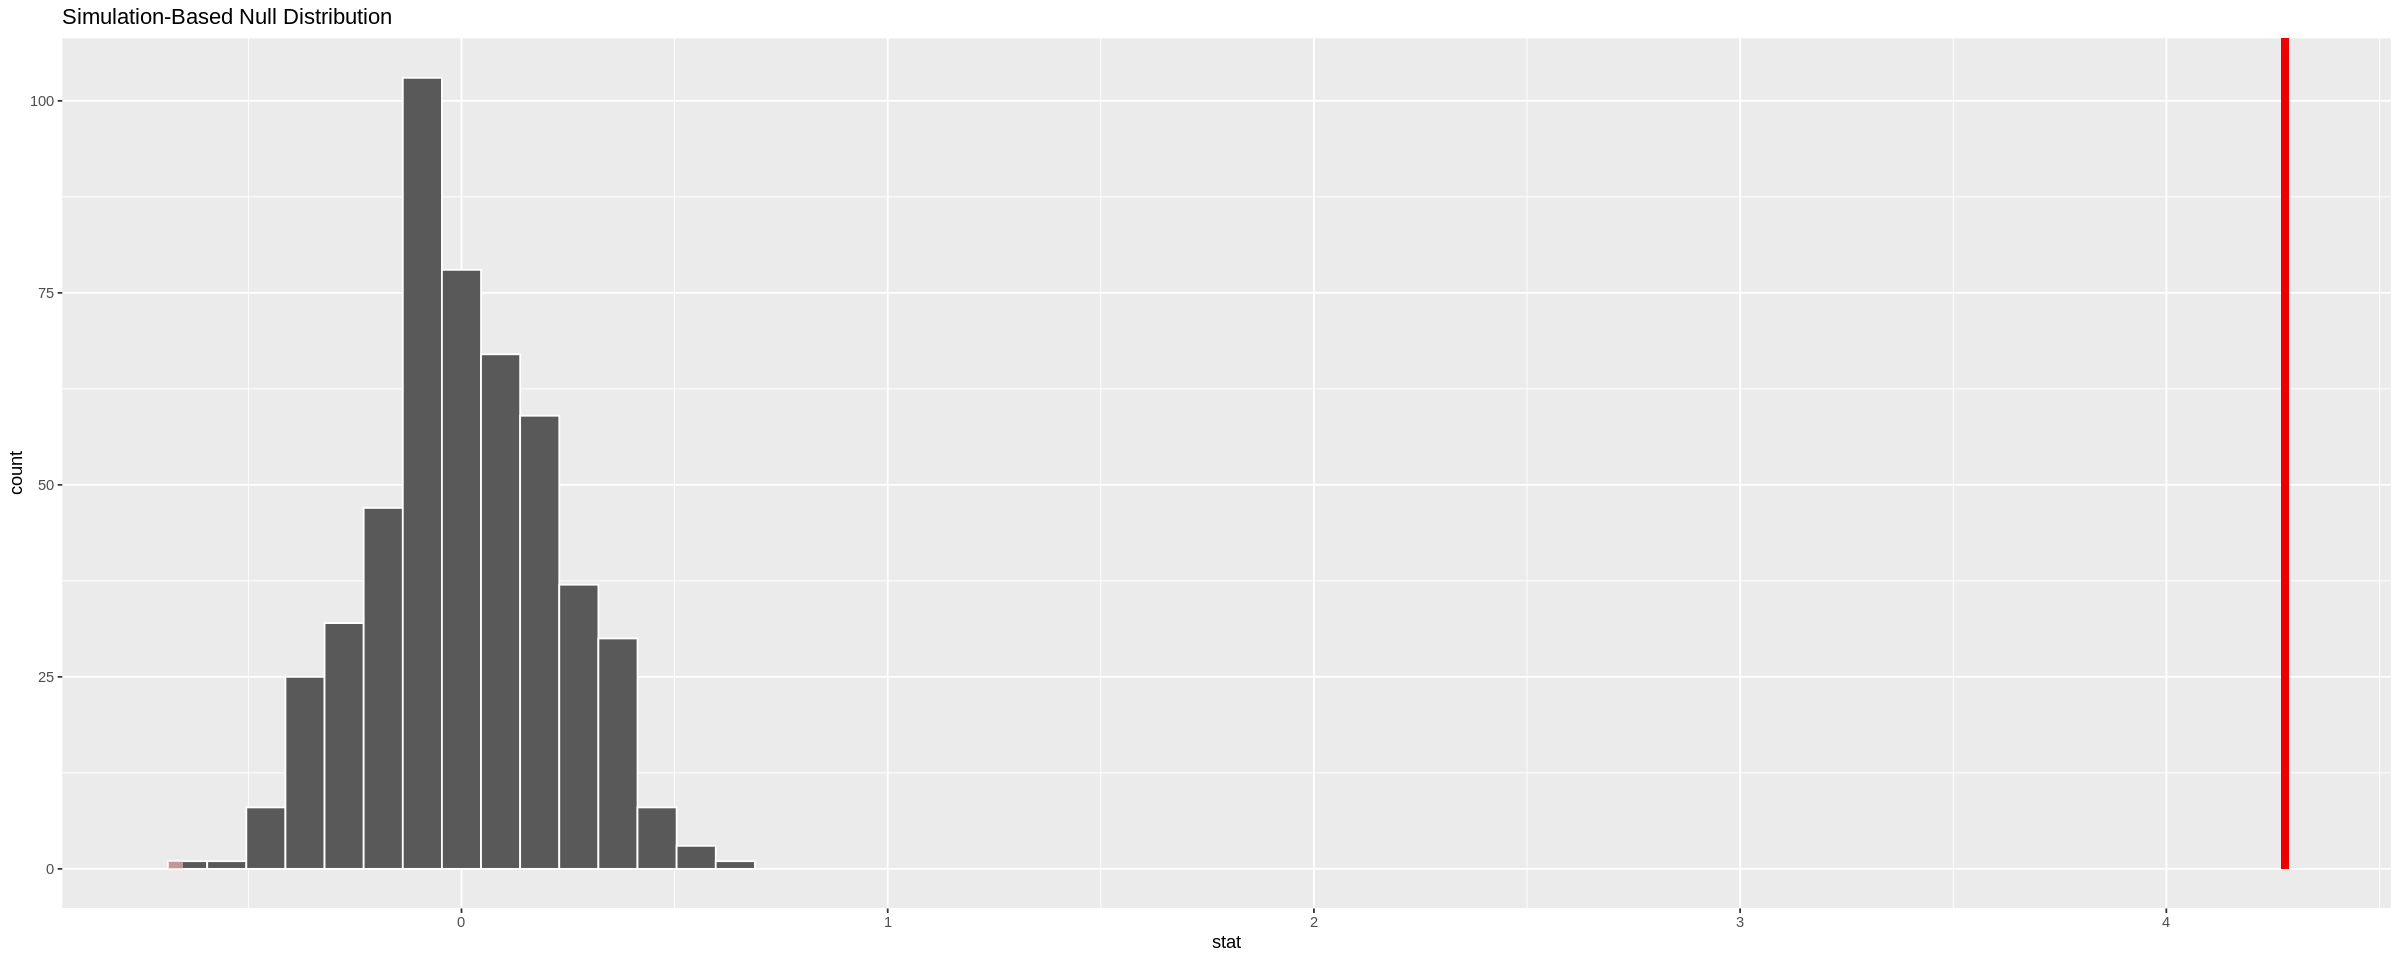

In [77]:
null_dist_2_sample %>%
  visualize() + 
  shade_p_value(observed_statistic,
                direction = "two-sided")

In [78]:
p_value_2_sample <- null_dist_2_sample %>%
  get_p_value(obs_stat = observed_statistic,
              direction = "two-sided")

p_value_2_sample

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0
